<a href="https://colab.research.google.com/github/lilyuski/deep-emotion-recognition/blob/main/emociones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El proyecto consiste en la detección de las emociones. Para ello, me he basado en el dataset ya desarrollado de kaggle https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data . Dado que ya se había terminado el challenge, he encontrado el dataset de base para poder entrenar mi IA https://www.kaggle.com/datasets/msambare/fer2013

Activamos GPU P100 !

Descargamos los paquetes que vayamos a necesitar

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

Como ya vimos previamente el dataset del que partimos son imágenes ordenadas en carpetas de la siguiente manera para cada caso, test y train. Por ello para poder trabajar con ellas, las vamos a cargar con ImageDataGenerator de Keras.
!

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Indicamos las rutas de las imágenes, tamaño de la imágen, lote y emociones. También laas vamos a normalizar

In [ ]:
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'

img_size = (48, 48)  # Tamaño de las imágenes
batch_size = 64      # Tamaño del lote
num_classes = 7      # Número de clases (emociones)

train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalizar imágenes
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

También vamos a dividir en la parte de entrenamiento y test

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


Una vez que tebemos las imágenes preparadasm vamos a construir y compilar el modelo

Descargamos alguna librería más

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from tensorflow.keras.layers import Input

In [ ]:
model = tf.keras.Sequential([
    Input(shape=(48, 48, 1)),  # Capa Input explícita
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 7 emociones
])

Dado que he tenido advertencia he tenido que modificar el código !

In [ ]:
# compilamos el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Es ahora cuando vamos a entrenar el modelo con los generadores de datos y los ** epoch ***

In [ ]:
epochs = 5

# Entremos el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 122s 260ms/step - accuracy: 0.2746 - loss: 1.7799 - val_accuracy: 0.4127 - val_loss: 1.5359
Epoch 2/5
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3906 - loss: 1.5882

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3906 - loss: 1.5882 - val_accuracy: 0.4000 - val_loss: 1.5876
Epoch 3/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.4062 - loss: 1.5499 - val_accuracy: 0.4588 - val_loss: 1.4191
Epoch 4/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.5000 - loss: 1.4463 - val_accuracy: 0.5000 - val_loss: 1.4144
Epoch 5/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.4403 - loss: 1.4533 - val_accuracy: 0.4802 - val_loss: 1.3635


Me he encontrado el siguiente error, por lo que he tenido que chequerar el uso de GPU así como instalar la version de tensorflow==2.15 así como modificar algunas líneas de código !

In [ ]:
!nvidia-smi

Thu Feb 20 20:52:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             33W /  250W |     535MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: ml-dtypes
    

Guardamos el modelo

In [ ]:
model.save('/kaggle/working/emotion_model.h5')

Ahora vamos a probar si el modelo funciona correctamente cargándole una foto de prueba

Instalamos alguna librería más

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Cargamos una de las fotos que he subido

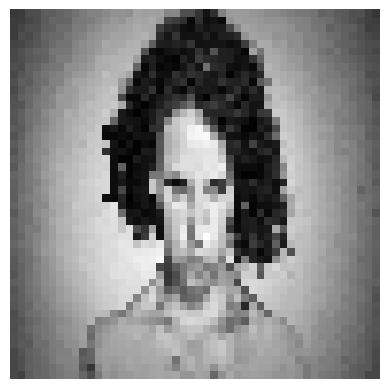

In [ ]:
image_path = '/kaggle/input/foto-prueba/_104901498_angry4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (48, 48))  # Redimensionar a 48x48
image = image.reshape(1, 48, 48, 1) / 255.0  # Normalizar y reformatear

#La mostramos
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

Hacemos la predicción

In [ ]:
emotions = ['Enojo', 'Asco', 'Miedo', 'Felicidad', 'Tristeza', 'Sorpresa', 'Neutral']
prediction = model.predict(image)
predicted_emotion = emotions[np.argmax(prediction)]

print(f"Emoción predicha: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Emoción predicha: Sorpresa


Por lo que he podido ver a nivel de dataset las imágenes de enfado con las que se ha entrenado son mucho más exageradas que la foto de enfado usada, por lo que efectivamente la foto se asimila mas a las de dataset de "Enojo"

En este caso la imágen